In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

## Generate banner

This banner uses `nanomesh` to generate the banner for `nanomesh`.

In [2]:
from nanomesh.plane import Plane
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


Load the source image.

<IPython.core.display.Javascript object>


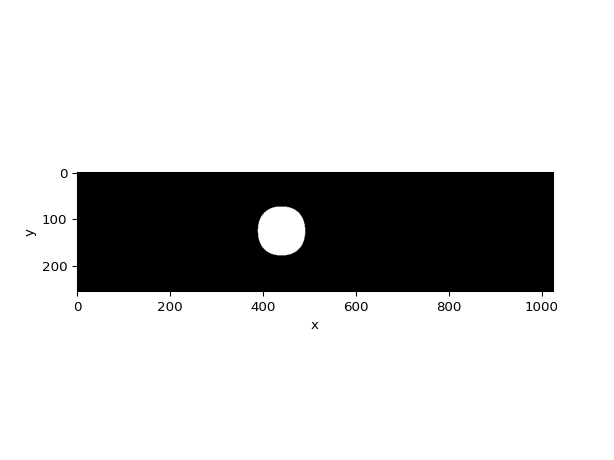

<AxesSubplot:xlabel='x', ylabel='y'>

In [3]:
banner_o = io.imread(r'banner_o.png')
plane = Plane(rgb2gray(banner_o))

seg = plane.binary_digitize(threshold=0.5)
seg.show()

### Contour finding

<IPython.core.display.Javascript object>


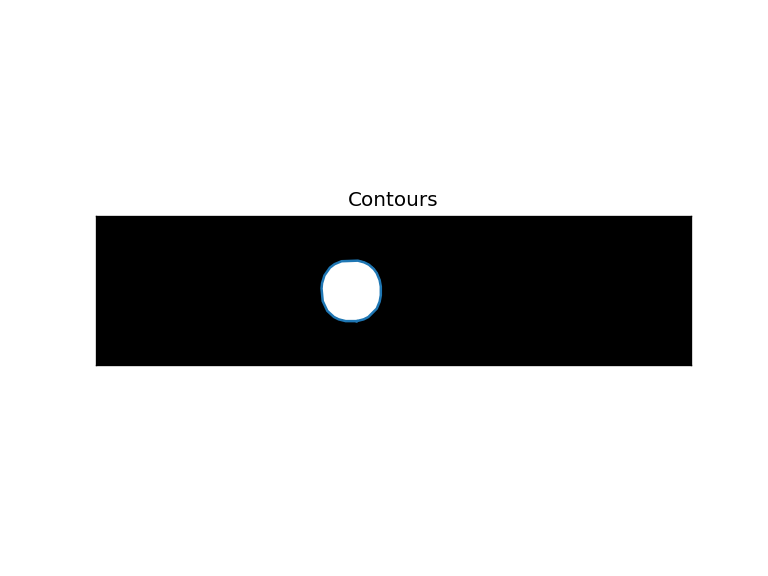

<AxesSubplot:title={'center':'Contours'}>

In [4]:
from nanomesh.mesh2d import Mesher2D

mesher = Mesher2D(seg.image)
mesher.generate_contours(max_contour_dist = 10)
mesher.plot_contour()

### Create the mesh

And compare with original image.

<IPython.core.display.Javascript object>


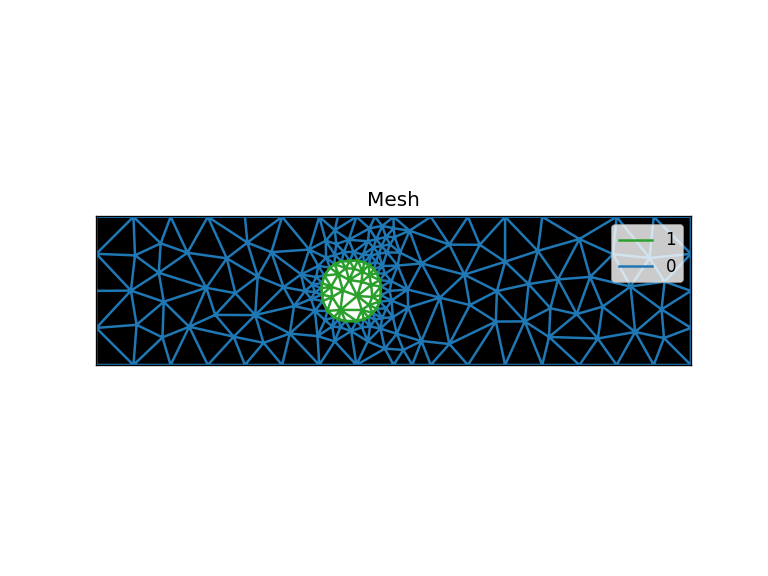

<AxesSubplot:title={'center':'Mesh'}>

In [5]:
mesh = mesher.triangulate(opts='q30a2500')
seg.compare_with_mesh(mesh)

### Create the banner using matplotlib

<IPython.core.display.Javascript object>


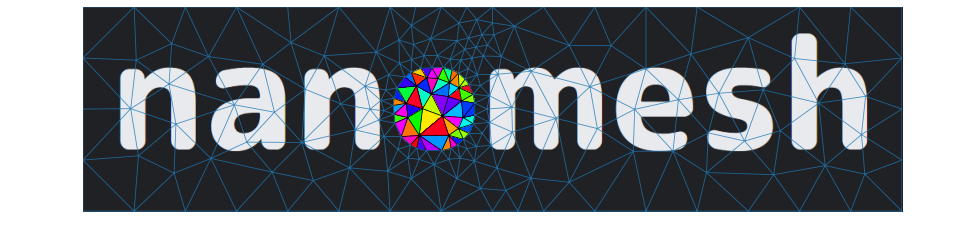

In [33]:
plt.rcParams['image.cmap'] = 'gist_rainbow'

banner_no_o = io.imread(r'banner_no_o.png')

points = mesh.vertices
triangles = mesh.faces
labels = mesh.metadata['labels']

x, y = points.T[::-1]

fig, ax = plt.subplots(figsize=(8, 2))
fig.tight_layout(pad=0)

ax.imshow(banner_no_o)
ax.axis('off')
ax.margins(0)

colors = np.arange(len(triangles))
np.random.shuffle(colors)  # mix up the colors
mask0 = (labels == 0)
ax.tripcolor(x, y, triangles=triangles, mask=mask0, facecolors=colors)
ax.triplot(x, y, triangles=triangles, mask=mask0, color='black', lw=0.5)

mask1 = (labels == 1)
ax.triplot(x, y, triangles=triangles, mask=mask1, lw=0.5, alpha=0.8)

plt.savefig('banner_final.png', bbox_inches='tight')